<a href="https://colab.research.google.com/github/joluispuma/Analisis_Pro_Banking/blob/main/AnalisisProBanking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Presentación

Trabajo elaborado por:
- Allan Echavarría -  allanechavarriag@gmail.com
- Andrés Felipe Restrepo - andrezrestrepo3@gmail.com
- José Luis Rodríguez - joluisrodriguez2008@gmail.com
- Luz Estella Cardona - eselgisa@gmail.com


El presente proyecto, “Fidelización Inteligente: Predicción de Comportamiento y Satisfacción de Clientes Bancarios mediante Ciencia de Datos para la Optimización del Servicio Financiero”, cuya data fue obtenida en la url  https://www.kaggle.com/datasets/marusagar/bank-customer-attrition-insights?resource=download, cuya información en este proyecto está basada en data sintética, con lo cual buscamos aportar una solución innovadora al problema del abandono de clientes y a la baja satisfacción en la experiencia bancaria. Utilizando herramientas avanzadas de ciencia de datos, análisis predictivo y visualización de información, se pretende desarrollar un modelo analítico que permita a las instituciones financieras comprender mejor el comportamiento de sus clientes, anticiparse a sus decisiones y actuar de forma estratégica para retenerlos.

En el contexto actual de la transformación digital, el sector bancario enfrenta desafíos crecientes en términos de competitividad, eficiencia operativa y satisfacción del cliente. La fidelización de los usuarios se ha convertido en un objetivo estratégico esencial para las entidades financieras, especialmente en un entorno donde la oferta de servicios es cada vez más homogénea y los clientes son más exigentes e informados.

El proyecto está en la línea de investigación nacional enfocada en la ciencia, tecnología e innovación como ejes para resolver desafíos sociales y económicos, y en la construcción de una sociedad del conocimiento. La aplicación de tecnologías de la información y comunicación (TIC) no solo mejorará la eficiencia de los servicios bancarios, sino que también aportará al bienestar de los usuarios y a la sostenibilidad del sector.


# Justificación

El valor de este proyecto radica en su capacidad de transformar grandes volúmenes de datos en conocimiento útil para la toma de decisiones, contribuyendo así a la transformación productiva del sector financiero. A través de la identificación de patrones de abandono, análisis de factores críticos de insatisfacción y evaluación de los canales de atención actuales, se podrá diseñar una estrategia de fidelización más efectiva, personalizada y basada en evidencia.

La variable de predicción importante para nuestro trabajo será la satisfacción de los clintes en la entidad bancaria, la cual muestra las diferente tendencias relacionadas con edades, cantidad de clientes, tipo de clientes, género, score crediticio segemento de cliente y salario estimado para lograr observar o modelar el segmento potencial que está insatisfecho, de esta manera lograr las predicciones y una oportuna retención de clientes bajo estrategias específicas para tal fin.

En definitiva, esta propuesta representa una oportunidad para mejorar la productividad económica del sistema financiero, impulsar la innovación tecnológica en la atención al cliente y fortalecer la relación entre las entidades bancarias y sus usuarios mediante soluciones inteligentes basadas en datos.

Se tiene los siguientes diccionarios de datos que trabajaremos.

* Nulos: La base de datos no tiene valores nulos en ninguna de sus 18 columnas. Esto es muy conveniente, pues así podremos avanzar sin tener que aplicar métodos de eliminación de nulos.

* Duplicados: La base de datos tiene 0 duplicados, por lo cual no es necesario realizar validacion y control de duplicados.

* Estructura: Hay tanto variables categóricas (Geography, Gender, Card Type) como numéricas (CreditScore, Age, Balance, Point Earned) e indicatorias (Complain, HasCrCard) en el conjunto de datos.

* La variable Complain tiene 0 o 1.

* La variable Satisfaction Score tiene una escala de 1 a 5.

* La variable Exited (nuestro objetivo analitico) también tiene 0 o 1.

# Ingestión de Datos

In [35]:
import pandas as pd
import numpy as np

# Carga de datos
df = pd.read_csv('/content/Bank-Customer-Attrition-Insights-Data.csv', delimiter=",")

#Validacion de encabezados
print("Primeras filas:")
print(df.head())


Primeras filas:
   RowNumber  CustomerId   Surname  CreditScore        Geography  Gender  Age  \
0          1    15598695    Fields          619        Antioquia  Female   42   
1          2    15649354  Johnston          608  Valle del cauca  Female   41   
2          3    15737556  Vasilyev          502        Antioquia  Female   42   
3          4    15671610    Hooper          699        Antioquia  Female   39   
4          5    15625092   Colombo          850  Valle del cauca  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
0        101348.88       1    

# Preparación y Limpieza


Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-nu

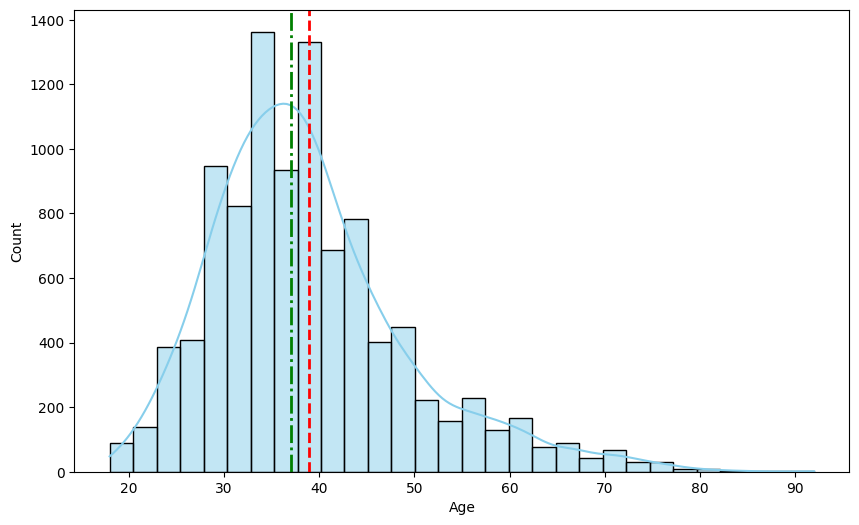

In [36]:
# tipos de datos y validacion de nulos
print("\nInformación general:")
print(df.info())

print("\nCantidad de nulos en cada columna:")
print(df.isnull().sum())

print("\nCantidad de duplicados:")
print("Duplicados :", df.duplicated().sum())
# Importe de librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))  # Tamaño del marco del grafico

# Histograma con línea KDE
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue', edgecolor='black')

# Líneas de media y mediana para mejor análisis descriptivo
plt.axvline(df['Age'].mean(), color='red', linestyle='--', linewidth=2, label=f'Media: {df["Age"].mean():.1f} años')
plt.axvline(df['Age'].median(), color='green', linestyle='-.', linewidth=2, label=f'Mediana: {df["Age"].median():.1f} años')

# Verificar cantidad de filas duplicadas
duplicados = df.duplicated().sum()

# Analítica descriptiva

In [37]:
# Almacenar estadísticas descriptivas básicas (media, min, max, std, etc.)
estadisticas_g = df.describe()

# Calcular la moda de cada columna (valor más frecuente)
moda = df.mode().iloc[0]
estadisticas_g

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,2.787400,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.341485,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


## **¿Que pasa con los datos?**

**Distribuciones univariadas**

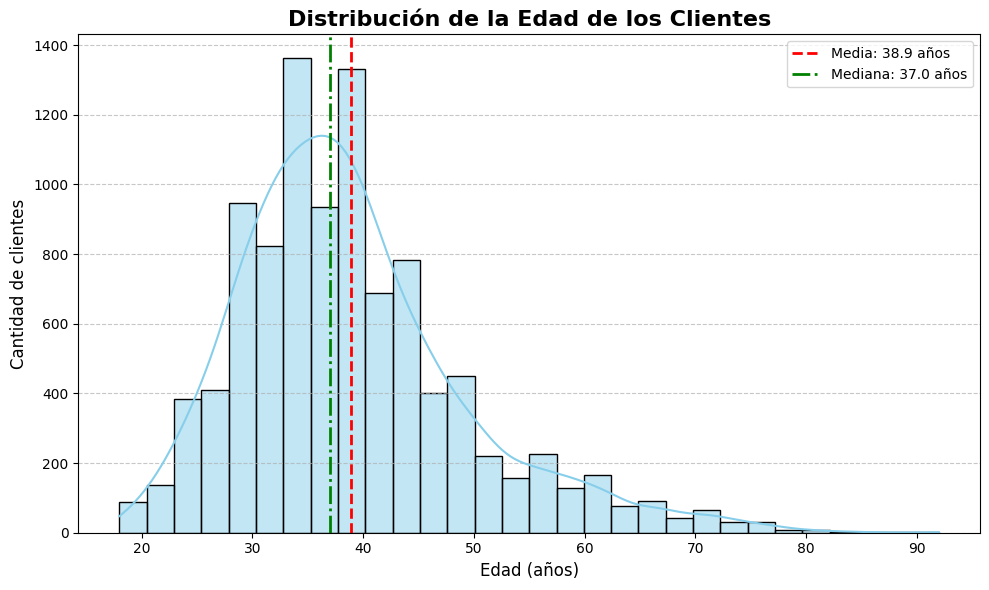

In [38]:
# =====================================================
# GRAFICO 1: Distribución de la edad de los clientes
# =====================================================

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))  # Tamaño del marco del grafico

# Histograma con línea KDE
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue', edgecolor='black')

# Líneas de media y mediana para mejor análisis descriptivo
plt.axvline(df['Age'].mean(), color='red', linestyle='--', linewidth=2, label=f'Media: {df["Age"].mean():.1f} años')
plt.axvline(df['Age'].median(), color='green', linestyle='-.', linewidth=2, label=f'Mediana: {df["Age"].median():.1f} años')

# Títulos y etiquetas
plt.title('Distribución de la Edad de los Clientes', fontsize=16, fontweight='bold')
plt.xlabel('Edad (años)', fontsize=12)
plt.ylabel('Cantidad de clientes', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Distribución de género (conteo):
 Gender
Male      5457
Female    4543
Name: count, dtype: int64

Distribución de género (porcentaje):
 Gender
Male      54.57
Female    45.43
Name: proportion, dtype: float64


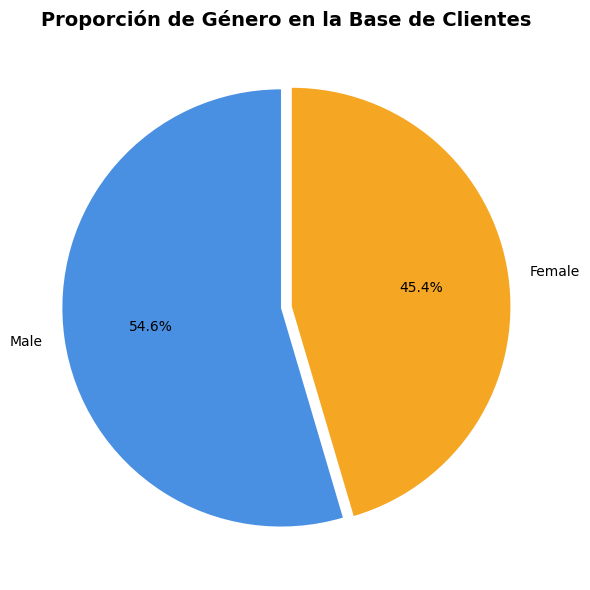

In [39]:
# =====================================================
# GRAFICO 2: Proporción de hombres y mujeres
# =====================================================

# Conteo de género
gender_counts = df['Gender'].value_counts()
gender_percent = df['Gender'].value_counts(normalize=True) * 100

# Mostrar distribución numérica y porcentual
print("Distribución de género (conteo):\n", gender_counts)
print("\nDistribución de género (porcentaje):\n", gender_percent.round(2))

# Gráfico de pastel
plt.figure(figsize=(6, 6))
colors = ['#4A90E2', '#F5A623']  # Colores diferenciados
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=colors, startangle=90, explode=(0.05, 0))
# Títulos y etiquetas
plt.title('Proporción de Género en la Base de Clientes', fontsize=14, fontweight='bold')

plt.axis('equal')  # Mantiene el círculo redondo

plt.tight_layout()
plt.show()


Distribución de satisfacción (conteo):
 Satisfaction Score
1    2168
2    2288
3    2540
4    1510
5    1494
Name: count, dtype: int64

Distribución de satisfacción (porcentaje):
 Satisfaction Score
1    21.68
2    22.88
3    25.40
4    15.10
5    14.94
Name: proportion, dtype: float64

Media de satisfacción: 2.79
Moda de satisfacción: 3


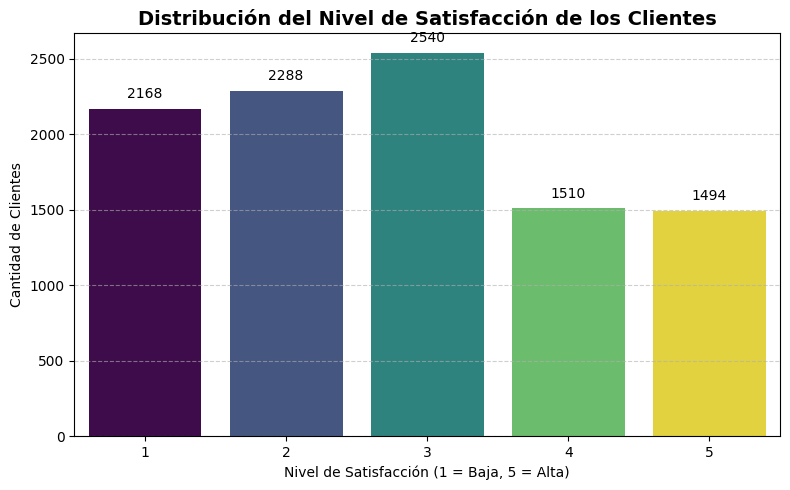

In [40]:
# =====================================================
# GRAFICO 3: Distribución del nivel de satisfacción
# =====================================================

# Conteo absoluto y relativo
satisfaction_counts = df['Satisfaction Score'].value_counts().sort_index()
satisfaction_percent = df['Satisfaction Score'].value_counts(normalize=True).sort_index() * 100

# Mostrar resumen numérico
print("Distribución de satisfacción (conteo):\n", satisfaction_counts)
print("\nDistribución de satisfacción (porcentaje):\n", satisfaction_percent.round(2))
print(f"\nMedia de satisfacción: {df['Satisfaction Score'].mean():.2f}")
print(f"Moda de satisfacción: {df['Satisfaction Score'].mode()[0]}")

satisfaction_df = satisfaction_counts.reset_index()
satisfaction_df.columns = ['Satisfaction', 'Count']

plt.figure(figsize=(8, 5))
sns.barplot(data=satisfaction_df, x='Satisfaction', y='Count', hue='Satisfaction', palette='viridis', legend=False)
plt.title('Distribución del Nivel de Satisfacción de los Clientes', fontsize=14, fontweight='bold')
plt.xlabel('Nivel de Satisfacción (1 = Baja, 5 = Alta)')
plt.ylabel('Cantidad de Clientes')

for i, val in enumerate(satisfaction_df['Count']):
    plt.text(i, val + 50, str(val), ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**Análisis bivariado (relaciones simples)**

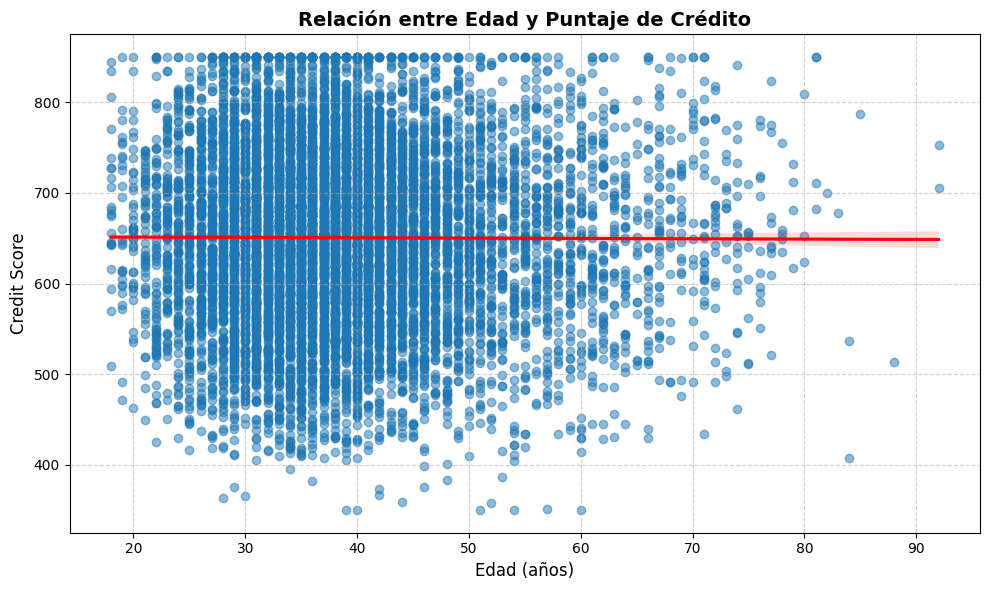

In [41]:
# =====================================================
# GRAFICO 4: Relación entre Edad y Credit Score
# =====================================================

plt.figure(figsize=(10, 6))

# Gráfico de dispersión con línea de regresión
sns.regplot(data=df, x='Age', y='CreditScore', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

# Títulos y etiquetas
plt.title('Relación entre Edad y Puntaje de Crédito', fontsize=14, fontweight='bold')
plt.xlabel('Edad (años)', fontsize=12)
plt.ylabel('Credit Score', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Distribución porcentual de clientes por nivel de satisfacción y abandono:

                    Retenidos (%)  Desertores (%)
Satisfaction Score                               
1                           80.58           19.42
2                           78.37           21.63
3                           80.43           19.57
4                           78.94           21.06
5                           79.45           20.55


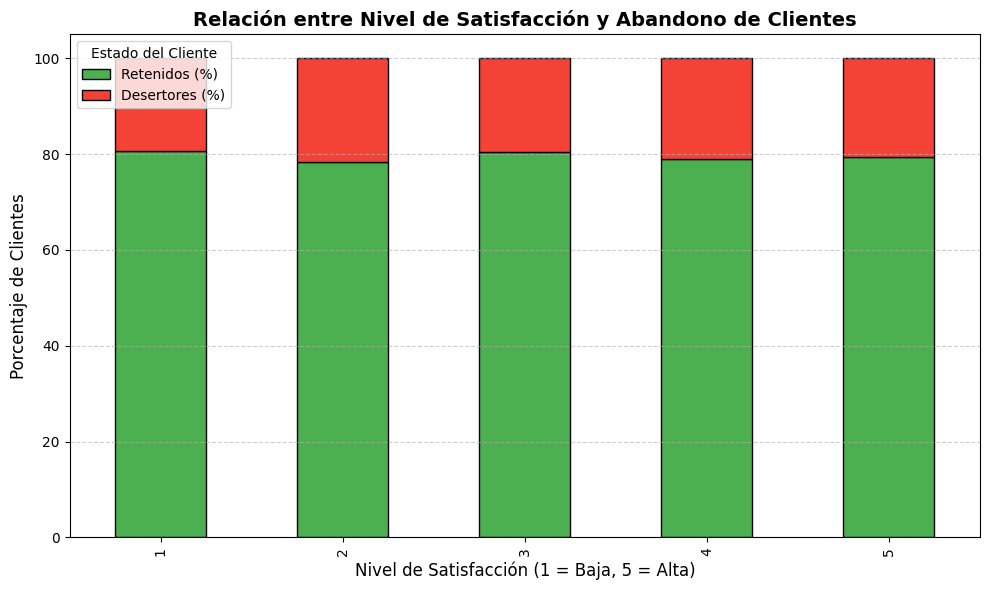

In [42]:
# =====================================================
# GRAFICO 5: Relación entre Satisfacción y Abandono (Exited)
# =====================================================

# Crear tabla cruzada
satisfaction_exited = pd.crosstab(df['Satisfaction Score'], df['Exited'], normalize='index') * 100
satisfaction_exited.columns = ['Retenidos (%)', 'Desertores (%)']

# Mostrar la tabla
print("Distribución porcentual de clientes por nivel de satisfacción y abandono:\n")
print(satisfaction_exited.round(2))

# Gráfico de barras apiladas
satisfaction_exited.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#4CAF50', '#F44336'], edgecolor='black')

# Títulos y etiquetas
plt.title('Relación entre Nivel de Satisfacción y Abandono de Clientes', fontsize=14, fontweight='bold')
plt.xlabel('Nivel de Satisfacción (1 = Baja, 5 = Alta)', fontsize=12)
plt.ylabel('Porcentaje de Clientes', fontsize=12)
plt.legend(title='Estado del Cliente', loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

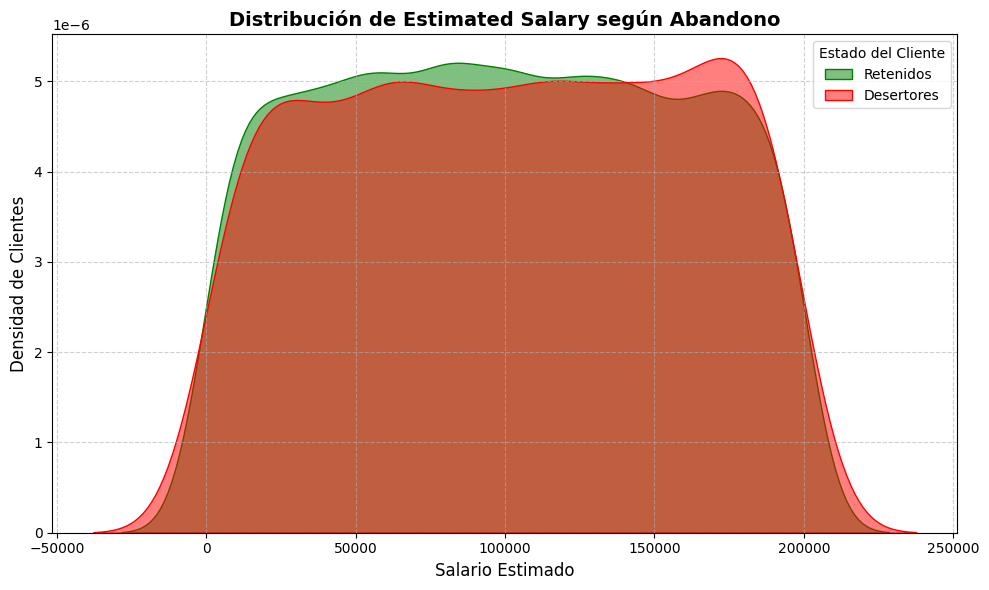

In [43]:
# =====================================================
# GRAFICO 6: Distribución de EstimatedSalary según abandono
# =====================================================

plt.figure(figsize=(10, 6))

# Gráfico de distribución KDE para comparar
sns.kdeplot(data=df[df['Exited'] == 0], x='EstimatedSalary', fill=True, label='Retenidos', color='green', alpha=0.5)
sns.kdeplot(data=df[df['Exited'] == 1], x='EstimatedSalary', fill=True, label='Desertores', color='red', alpha=0.5)

# Títulos y etiquetas
plt.title('Distribución de Estimated Salary según Abandono', fontsize=14, fontweight='bold')
plt.xlabel('Salario Estimado', fontsize=12)
plt.ylabel('Densidad de Clientes', fontsize=12)
plt.legend(title='Estado del Cliente')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**Segmentación**

En esta parte es importante comprender el concepto de Bin: En estadística, un bin (también llamado intervalo de clase o contenedor) es un rango de valores utilizados para agrupar datos en un histograma o en otras visualizaciones y análisis de datos. Se utiliza para simplificar la presentación de grandes conjuntos de datos, permitiendo visualizar la distribución de los mismos.

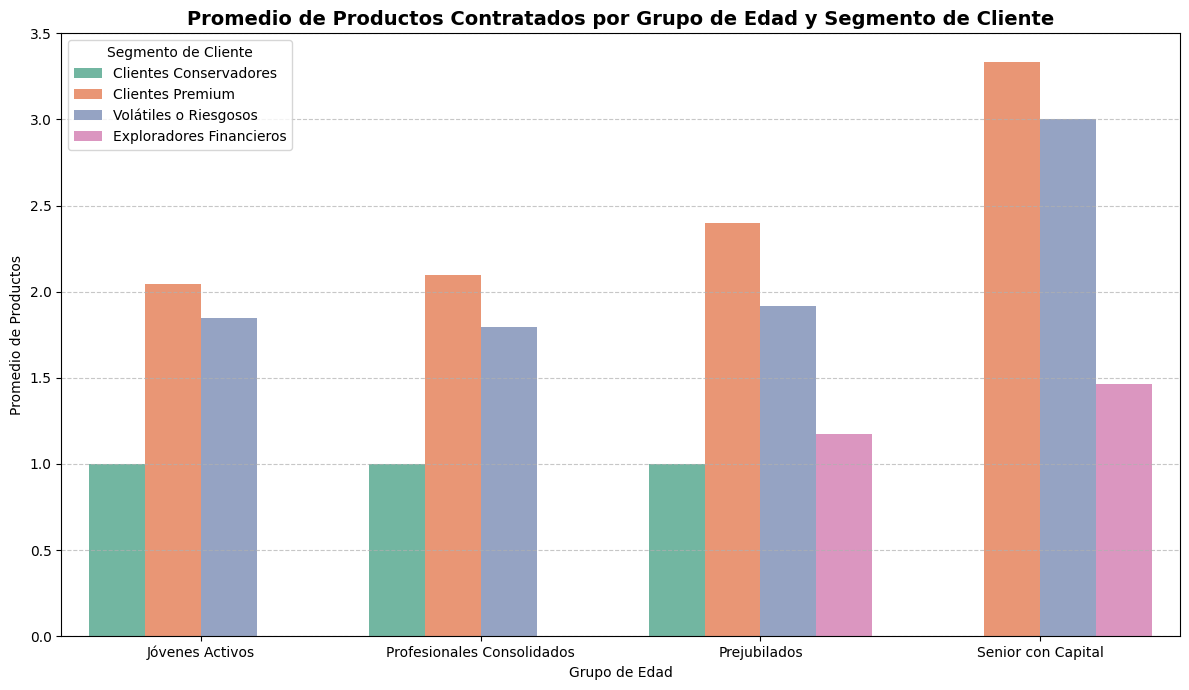

In [44]:
# =====================================================
# GRAFICO 7: Segmentacion de clientes segun productos
# =====================================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np

# Agrupamos edades por segmento representativo
bins = [18, 30, 45, 60, 100]
labels = ['Jóvenes Activos', 'Profesionales Consolidados', 'Prejubilados', 'Senior con Capital']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Ahora aplicamos KMeans para segmentar el comportamiento por edad y productos
# Escalamos las variables relevantes
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['Age', 'NumOfProducts', 'Balance', 'CreditScore']])

# Elegimos número de clusters usando codo
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Asignamos nombres manuales para los clusters basados en interpretación analítica
nombre_clusters = {
    0: 'Clientes Conservadores',
    1: 'Exploradores Financieros',
    2: 'Clientes Premium',
    3: 'Volátiles o Riesgosos'
}
df['SegmentoCliente'] = df['Cluster'].map(nombre_clusters)

# Calculamos promedio de productos por grupo de edad y cluster
resumen = df.groupby(['AgeGroup', 'SegmentoCliente'], observed=True)['NumOfProducts'].mean().reset_index()

# Graficamos
plt.figure(figsize=(12, 7))
sns.barplot(data=resumen, x='AgeGroup', y='NumOfProducts', hue='SegmentoCliente', palette='Set2')

plt.title('Promedio de Productos Contratados por Grupo de Edad y Segmento de Cliente', fontsize=14, fontweight='bold')
plt.xlabel('Grupo de Edad')
plt.ylabel('Promedio de Productos')
plt.legend(title='Segmento de Cliente')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

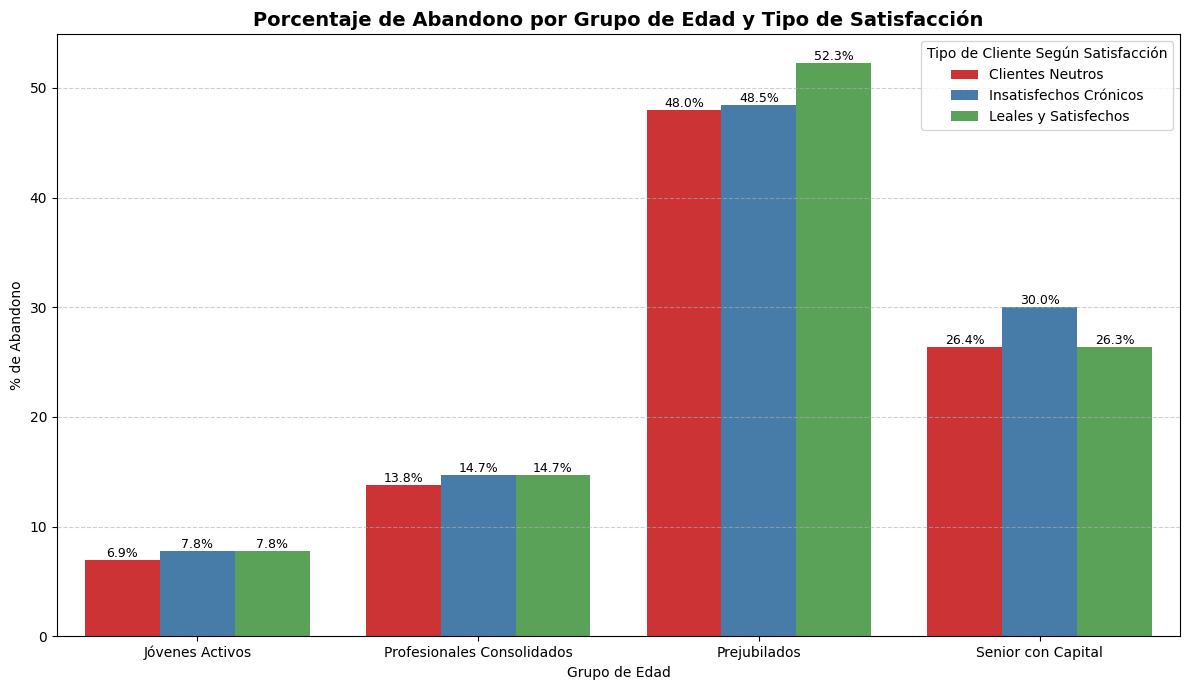

In [45]:
# =====================================================
# GRAFICO 8: Segmentacion de satisfaccion por abandono
# =====================================================

from sklearn.cluster import KMeans

# Nos aseguramos de que AgeGroup ya esté definido
bins = [18, 30, 45, 60, 100]
labels = ['Jóvenes Activos', 'Profesionales Consolidados', 'Prejubilados', 'Senior con Capital']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Clustering sobre Satisfaction Score
satisfaction_values = df[['Satisfaction Score']].values
kmeans_satisf = KMeans(n_clusters=3, random_state=42)
df['SatisfCluster'] = kmeans_satisf.fit_predict(satisfaction_values)

# Mapeamos los clusters a etiquetas cualitativas
orden_cluster = df.groupby('SatisfCluster')['Satisfaction Score'].mean().sort_values().index.tolist()
nombres_cluster_satisf = {
    orden_cluster[0]: 'Insatisfechos Crónicos',
    orden_cluster[1]: 'Clientes Neutros',
    orden_cluster[2]: 'Leales y Satisfechos'
}
df['TipoSatisfaccion'] = df['SatisfCluster'].map(nombres_cluster_satisf)

# Agrupación por grupo de edad y tipo de satisfacción
df_age_satisf = df.groupby(['AgeGroup', 'TipoSatisfaccion'], observed=True).agg(
    Total=('Exited', 'count'),
    Abandonos=('Exited', 'sum')
).reset_index()

# Cálculo del % de abandono
df_age_satisf['PorcentajeAbandono'] = (df_age_satisf['Abandonos'] / df_age_satisf['Total']) * 100

plt.figure(figsize=(12, 7))
sns.barplot(
    data=df_age_satisf,
    x='AgeGroup',
    y='PorcentajeAbandono',
    hue='TipoSatisfaccion',
    palette='Set1'
)

plt.title('Porcentaje de Abandono por Grupo de Edad y Tipo de Satisfacción', fontsize=14, fontweight='bold')
plt.ylabel('% de Abandono')
plt.xlabel('Grupo de Edad')
plt.legend(title='Tipo de Cliente Según Satisfacción')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Etiquetas con porcentaje en cada barra
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9)

plt.tight_layout()
plt.show()

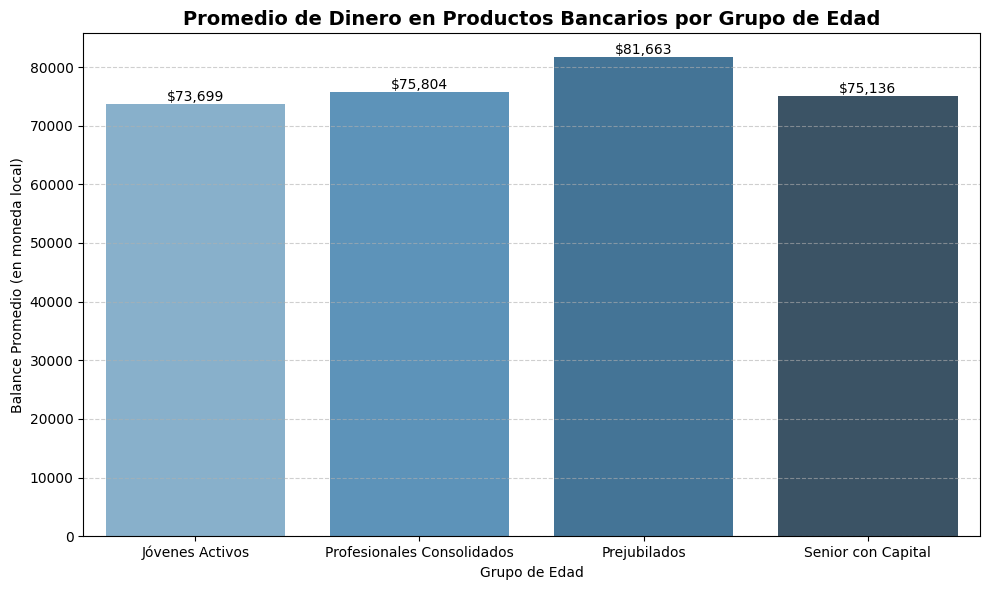

In [46]:

# Aseguramos que el grupo de edad esté definido
bins = [18, 30, 45, 60, 100]
labels = ['Jóvenes Activos', 'Profesionales Consolidados', 'Prejubilados', 'Senior con Capital']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Agrupamos y calculamos el balance promedio
df_balance = df.groupby('AgeGroup', observed=True)['Balance'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_balance,
    x='AgeGroup',
    y='Balance',
    hue='AgeGroup',
    palette='Blues_d',
    legend=False
)

plt.title('Promedio de Dinero en Productos Bancarios por Grupo de Edad', fontsize=14, fontweight='bold')
plt.xlabel('Grupo de Edad')
plt.ylabel('Balance Promedio (en moneda local)')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Etiquetas con valores monetarios
for index, row in df_balance.iterrows():
    plt.text(index, row['Balance'] + 500, f"${row['Balance']:,.0f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

Dashboard analitico

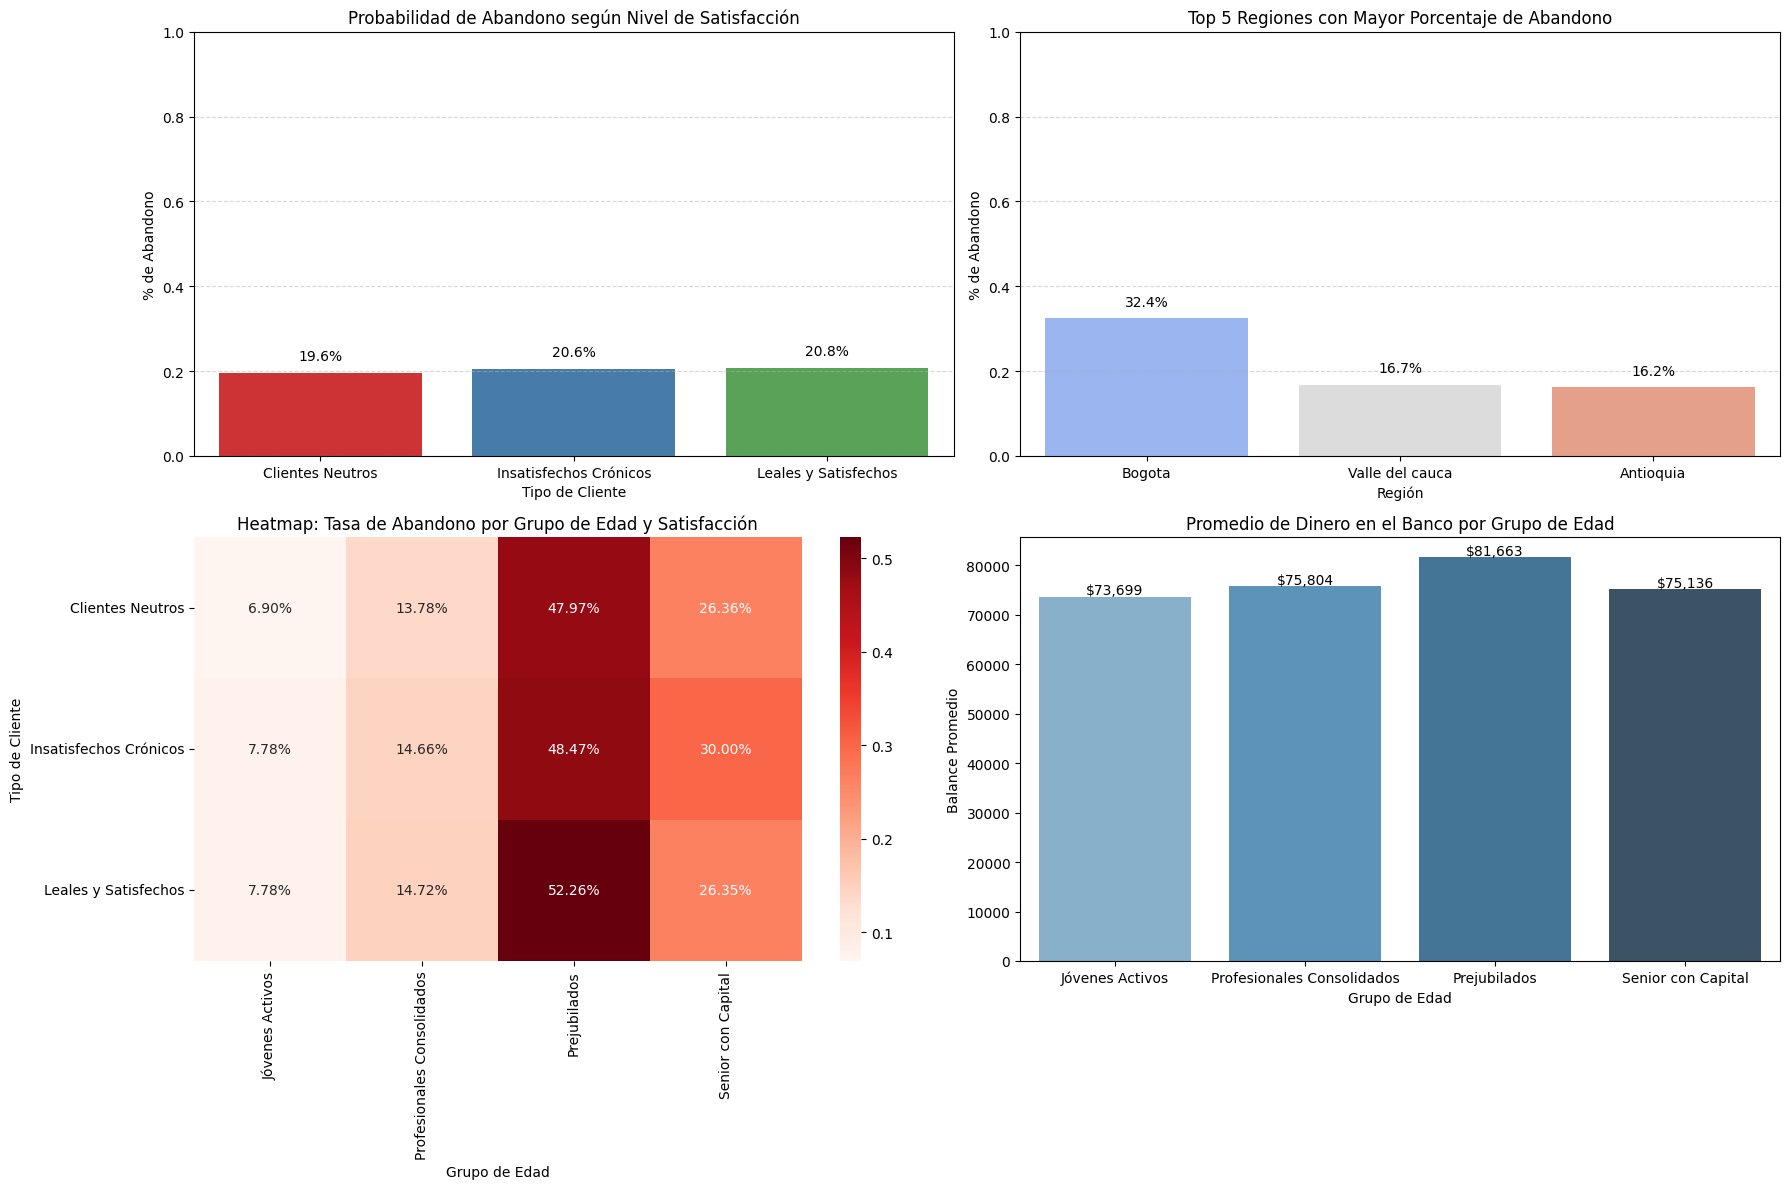

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans

# Segmentación por edad
bins = [18, 30, 45, 60, 100]
labels = ['Jóvenes Activos', 'Profesionales Consolidados', 'Prejubilados', 'Senior con Capital']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Clustering por satisfacción
kmeans_satisf = KMeans(n_clusters=3, random_state=42)
df['SatisfCluster'] = kmeans_satisf.fit_predict(df[['Satisfaction Score']])

# Asignar nombres cualitativos a los clusters de satisfacción
orden_cluster = df.groupby('SatisfCluster')['Satisfaction Score'].mean().sort_values().index.tolist()
nombres_cluster_satisf = {
    orden_cluster[0]: 'Insatisfechos Crónicos',
    orden_cluster[1]: 'Clientes Neutros',
    orden_cluster[2]: 'Leales y Satisfechos'
}
df['TipoSatisfaccion'] = df['SatisfCluster'].map(nombres_cluster_satisf)

# -------------------- Graficas --------------------

plt.figure(figsize=(18, 12))

# --------- 1. Abandono según satisfacción (humor) ---------
plt.subplot(2, 2, 1)
df_satisf = df.groupby('TipoSatisfaccion', observed=True)['Exited'].mean().reset_index()
sns.barplot(
    data=df_satisf,
    x='TipoSatisfaccion',
    y='Exited',
    hue='TipoSatisfaccion',
    palette='Set1',
    legend=False
)
plt.title('Probabilidad de Abandono según Nivel de Satisfacción')
plt.ylabel('% de Abandono')
plt.xlabel('Tipo de Cliente')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
for i, row in df_satisf.iterrows():
    plt.text(i, row['Exited'] + 0.03, f"{row['Exited']*100:.1f}%", ha='center')

# --------- 2. Top 5 regiones con más abandono ---------
plt.subplot(2, 2, 2)
df_regiones = df.groupby('Geography', observed=True)['Exited'].mean().sort_values(ascending=False).head(5).reset_index()
sns.barplot(
    data=df_regiones,
    x='Geography',
    y='Exited',
    hue='Geography',
    palette='coolwarm',
    legend=False
)
plt.title('Top 5 Regiones con Mayor Porcentaje de Abandono')
plt.ylabel('% de Abandono')
plt.xlabel('Región')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
for i, row in df_regiones.iterrows():
    plt.text(i, row['Exited'] + 0.03, f"{row['Exited']*100:.1f}%", ha='center')

# --------- 3. Heatmap Edad + Satisfacción ---------
plt.subplot(2, 2, 3)
df_combo = df.groupby(['AgeGroup', 'TipoSatisfaccion'], observed=True)['Exited'].mean().reset_index()
pivot_df = df_combo.pivot(index='TipoSatisfaccion', columns='AgeGroup', values='Exited')
sns.heatmap(pivot_df, annot=True, fmt='.2%', cmap='Reds')
plt.title('Heatmap: Tasa de Abandono por Grupo de Edad y Satisfacción')
plt.xlabel('Grupo de Edad')
plt.ylabel('Tipo de Cliente')

# --------- 4. Balance promedio por grupo de edad ---------
plt.subplot(2, 2, 4)
df_balance = df.groupby('AgeGroup', observed=True)['Balance'].mean().reset_index()
sns.barplot(
    data=df_balance,
    x='AgeGroup',
    y='Balance',
    hue='AgeGroup',
    palette='Blues_d',
    legend=False
)
plt.title('Promedio de Dinero en el Banco por Grupo de Edad')
plt.ylabel('Balance Promedio')
plt.xlabel('Grupo de Edad')
for i, row in df_balance.iterrows():
    plt.text(i, row['Balance'] + 500, f"${row['Balance']:,.0f}", ha='center')

plt.tight_layout()
plt.show()

# Análisis de Negocio

**Preguntas de análisis de negocio:**



**Perfil y segmentación de clientes**
* ¿Cuál es la distribución de tipos de tarjeta entre los clientes?
* ¿Cuál es la edad promedio de los clientes con mayor Credit Score?
* ¿Cuál es el promedio de productos bancarios contratados por sexo?

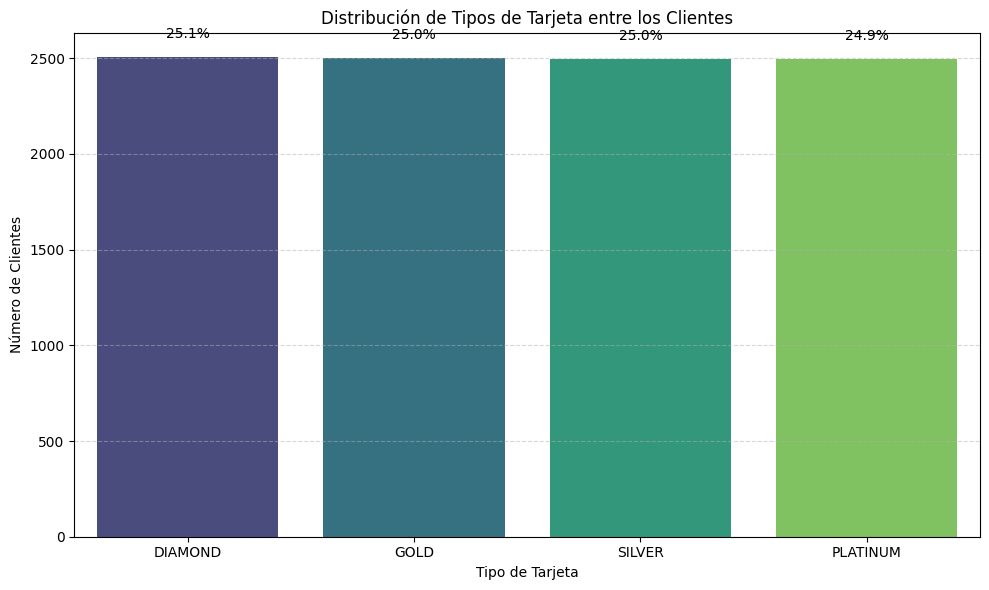

In [64]:
# =====================================================
# ¿Cuál es la distribución de tipos de tarjeta entre los clientes?
# =====================================================

#Analizar la distribución de tipos de tarjeta (Card Type) nos da información clave para entender preferencias de productos financieros y posibles correlaciones con la retención o abandono. Esto puede influir en decisiones como rediseño de productos, promociones o segmentación de campañas.

import matplotlib.pyplot as plt
import seaborn as sns

# ----------------- Distribución de Tipos de Tarjeta -----------------

# Contamos la cantidad de clientes por tipo de tarjeta
df_tarjetas = df['Card Type'].value_counts().reset_index()
df_tarjetas.columns = ['Card Type', 'Cantidad']

# Calculamos el porcentaje sobre el total
df_tarjetas['Porcentaje'] = df_tarjetas['Cantidad'] / df_tarjetas['Cantidad'].sum()

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_tarjetas,
    x='Card Type',
    y='Cantidad',
    hue='Card Type',
    palette='viridis',
    dodge=False,
    legend=False
)
plt.title('Distribución de Tipos de Tarjeta entre los Clientes')
plt.xlabel('Tipo de Tarjeta')
plt.ylabel('Número de Clientes')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Etiquetas con porcentaje encima de las barras
for i, row in df_tarjetas.iterrows():
    plt.text(i, row['Cantidad'] + 100, f"{row['Porcentaje']*100:.1f}%", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

Edad promedio de los clientes con Credit Score en el top 10%: 38.96 años


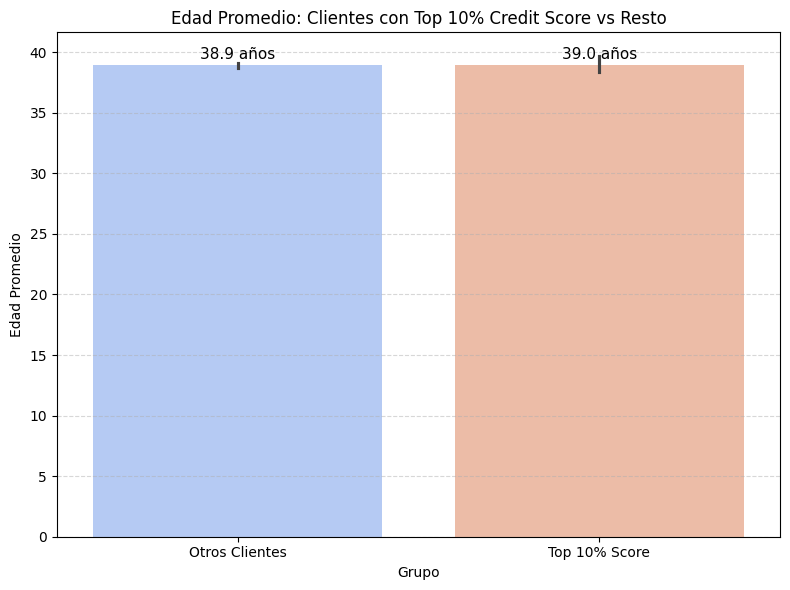

In [49]:
# =====================================================
# ¿Cuál es la edad promedio de los clientes con mayor Credit Score?
# =====================================================

#Esta pregunta apunta directamente a perfilar a los clientes más financieramente "sanos" según su CreditScore y ver si hay una relación etaria con este puntaje alto. Eso puede dar luz sobre qué segmento etario maneja mejor su historial crediticio.

#Top 10% de CreditScore (percentil 90 en adelante)

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ---------------------- Clientes con Mayor Credit Score ---------------------

# Calcular el percentil 90 del Credit Score
percentil_90 = df['CreditScore'].quantile(0.90)

# Filtrar los clientes que tienen un Credit Score en el top 10%
clientes_top_score = df[df['CreditScore'] >= percentil_90]

# Calcular la edad promedio de este grupo
edad_promedio_top = clientes_top_score['Age'].mean()

# Mostrar el resultado numérico
print(f"Edad promedio de los clientes con Credit Score en el top 10%: {edad_promedio_top:.2f} años")

# ---------------------- Visualización Comparativa ----------------------

# Agregar una columna binaria: 'Top Score' vs 'No Top Score'
df['TopScore'] = df['CreditScore'] >= percentil_90

# Graficar la comparación de edad promedio entre ambos grupos
plt.figure(figsize=(8, 6))
sns.barplot(
    data=df,
    x='TopScore',
    y='Age',
    hue='TopScore',
    palette='coolwarm',
    dodge=False,
    legend=False
)

# Ejes legibles
plt.xticks([0, 1], ['Otros Clientes', 'Top 10% Score'])
plt.title('Edad Promedio: Clientes con Top 10% Credit Score vs Resto')
plt.ylabel('Edad Promedio')
plt.xlabel('Grupo')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Mostrar valores encima de cada barra
mean_ages = df.groupby('TopScore')['Age'].mean().values
for i, val in enumerate(mean_ages):
    plt.text(i, val + 0.5, f"{val:.1f} años", ha='center', fontsize=11)

plt.tight_layout()
plt.show()

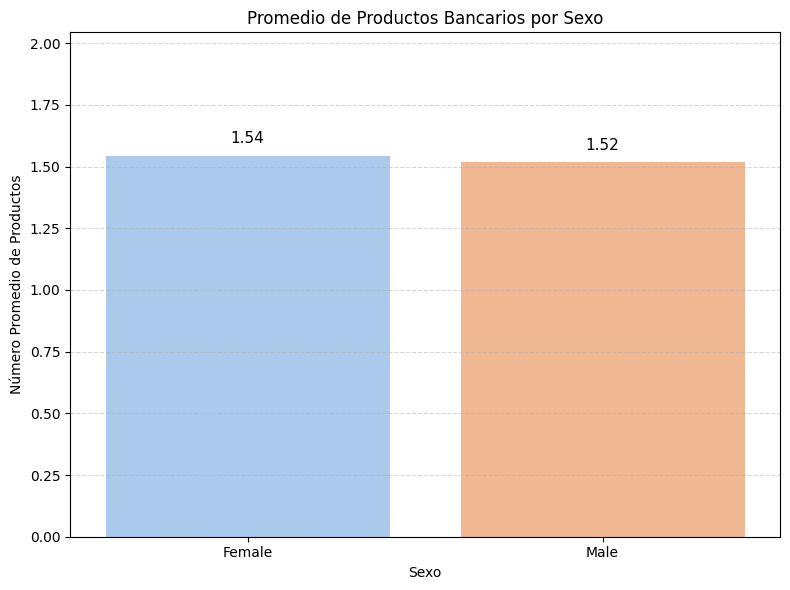

In [50]:
# =====================================================
# ¿Cuál es el promedio de productos bancarios contratados por sexo?
# =====================================================

#Analizar el número promedio de productos bancarios (NumOfProducts) por sexo nos puede mostrar diferencias relevantes en comportamiento financiero entre hombres y mujeres. Esto puede reflejar:

#Preferencias de consumo financiero.

#Diferencias de asesoría o segmentación de mercado.

#sesgos estructurales en la oferta.

import matplotlib.pyplot as plt
import seaborn as sns

# ------------------ Promedio de productos por sexo ------------------

# Agrupamos por género y calculamos promedio
df_genero_productos = df.groupby('Gender')['NumOfProducts'].mean().reset_index()

# Gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(
    data=df_genero_productos,
    x='Gender',
    y='NumOfProducts',
    hue='Gender',
    palette='pastel',
    dodge=False,
    legend=False
)
plt.title('Promedio de Productos Bancarios por Sexo')
plt.ylabel('Número Promedio de Productos')
plt.xlabel('Sexo')
plt.ylim(0, df_genero_productos['NumOfProducts'].max() + 0.5)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Etiquetas encima de las barras
for i, row in df_genero_productos.iterrows():
    plt.text(i, row['NumOfProducts'] + 0.05, f"{row['NumOfProducts']:.2f}", ha='center', fontsize=11)

plt.tight_layout()
plt.show()


**Uso y actividad financiera**
* ¿Cuál es el balance promedio de los clientes activos (IsActiveMember = 1)?
* ¿Cuál es la geografía con mayor proporción de clientes activos?
* ¿Cuál es el salario promedio de los clientes que más consumen?

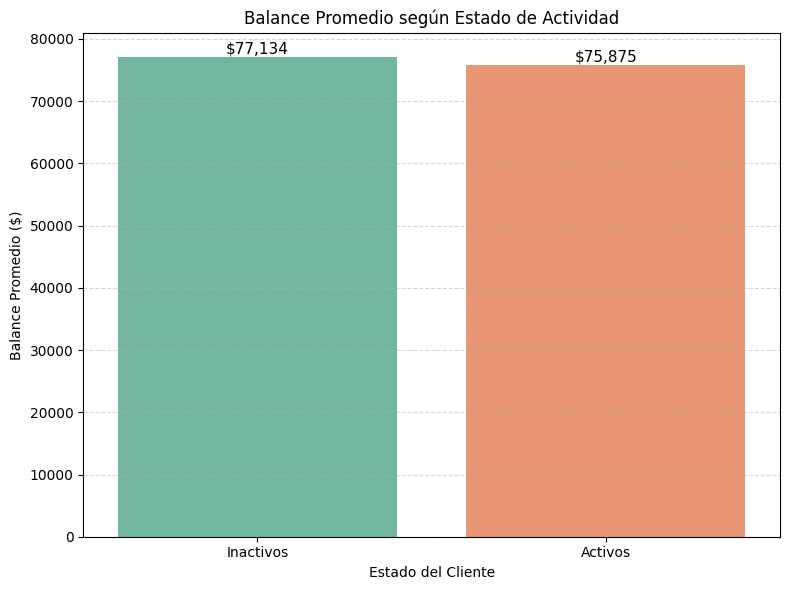

In [51]:
# =====================================================
# ¿Cuál es el balance promedio de los clientes activos (IsActiveMember = 1)?
# =====================================================

#Con esto se puede evaluar si vale la pena invertir en mantenerlos activos (con beneficios, campañas, etc.) o si hay que revisar qué se entiende realmente por activo (a veces están “activos” en la base pero no en la relación real con el banco).

import matplotlib.pyplot as plt
import seaborn as sns

# ------------------ Balance promedio por estado de actividad ---------------

# Agrupamos por actividad y calculamos promedio
df_actividad = df.groupby('IsActiveMember')['Balance'].mean().reset_index()

# Convertimos 0/1 a etiquetas legibles
df_actividad['Estado'] = df_actividad['IsActiveMember'].map({0: 'Inactivos', 1: 'Activos'})

# Gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(
    data=df_actividad,
    x='Estado',
    y='Balance',
    hue='Estado',
    palette='Set2',
    dodge=False,
    legend=False
)
plt.title('Balance Promedio según Estado de Actividad')
plt.ylabel('Balance Promedio ($)')
plt.xlabel('Estado del Cliente')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Etiquetas con valores encima de las barras
for i, row in df_actividad.iterrows():
    plt.text(i, row['Balance'] + 500, f"${row['Balance']:,.0f}", ha='center', fontsize=11)

plt.tight_layout()
plt.show()

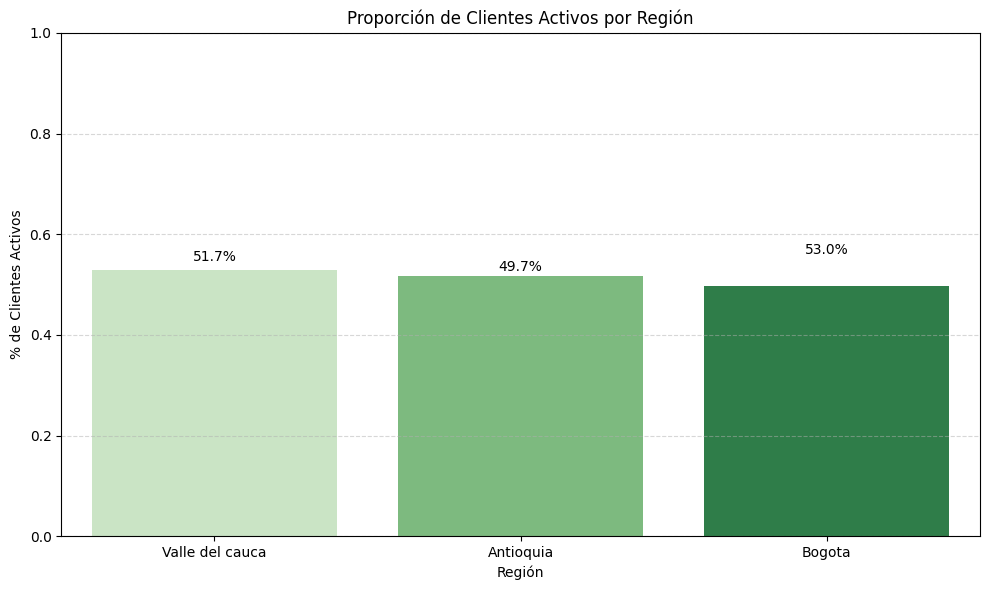

In [52]:
# =====================================================
# ¿Cuál es la geografía con mayor proporción de clientes activos?
# =====================================================

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ------------------ Proporción de clientes activos por geografía ----------

# Agrupamos por región y calculamos proporción de clientes activos
df_activos_geo = df.groupby('Geography')['IsActiveMember'].mean().reset_index()
df_activos_geo.rename(columns={'IsActiveMember': 'ProporcionActivos'}, inplace=True)

# Ordenamos de mayor a menor
df_activos_geo = df_activos_geo.sort_values('ProporcionActivos', ascending=False)

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_activos_geo,
    x='Geography',
    y='ProporcionActivos',
    hue='Geography',
    palette='Greens',
    dodge=False,
    legend=False
)
plt.title('Proporción de Clientes Activos por Región')
plt.ylabel('% de Clientes Activos')
plt.xlabel('Región')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Etiquetas con porcentaje encima de las barras
for i, row in df_activos_geo.iterrows():
    plt.text(i, row['ProporcionActivos'] + 0.03, f"{row['ProporcionActivos']*100:.1f}%", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

Salario promedio de los clientes en el top 10% de consumo: $100,713.83


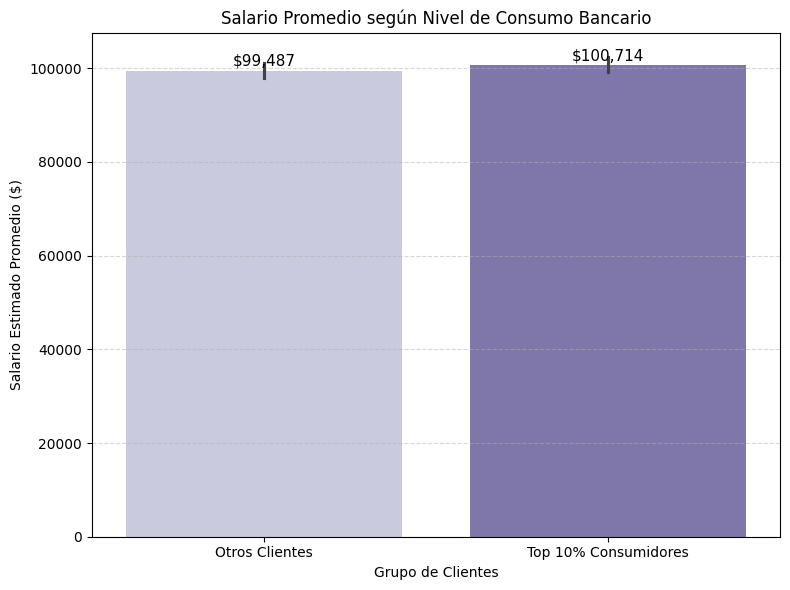

In [53]:
# =====================================================
# ¿Cuál es el salario promedio de los clientes que más consumen?
# =====================================================

#entender la relación entre consumo de productos bancarios (NumOfProducts) y salario estimado (EstimatedSalary). Esto puede revelar perfiles de clientes que:

#Tienen alta capacidad adquisitiva y confían en el banco.

#tienen ingresos bajos pero muchos productos (¿sobreendeudamiento?).

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ------------------ Salario promedio: Clientes con más productos ------------------

# Umbral del top 10% de productos bancarios
umbral_top_productos = df['NumOfProducts'].quantile(0.90)

# Filtrar clientes que están en ese top
clientes_top_consumo = df[df['NumOfProducts'] >= umbral_top_productos]

# Calcular salario promedio de ese grupo
salario_prom_top = clientes_top_consumo['EstimatedSalary'].mean()
print(f"Salario promedio de los clientes en el top 10% de consumo: ${salario_prom_top:,.2f}")

# Comparativa gráfica con los demás
df['TopConsumidor'] = df['NumOfProducts'] >= umbral_top_productos

plt.figure(figsize=(8, 6))
sns.barplot(
    data=df,
    x='TopConsumidor',
    y='EstimatedSalary',
    hue='TopConsumidor',
    palette='Purples',
    dodge=False,
    legend=False
)
plt.xticks([0, 1], ['Otros Clientes', 'Top 10% Consumidores'])
plt.title('Salario Promedio según Nivel de Consumo Bancario')
plt.ylabel('Salario Estimado Promedio ($)')
plt.xlabel('Grupo de Clientes')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Etiquetas encima de cada barra
salarios = df.groupby('TopConsumidor')['EstimatedSalary'].mean().values
for i, val in enumerate(salarios):
    plt.text(i, val + 1000, f"${val:,.0f}", ha='center', fontsize=11)

plt.tight_layout()
plt.show()

**Satisfacción y abandono**
* ¿Cuál es el nivel promedio de satisfacción por tipo de tarjeta?
* ¿Los clientes que se quejan (Complain = 1) tienen mayor probabilidad de abandonar el banco?
* ¿Cómo varía la tasa de abandono por region (Geography)?
* ¿Cuál es el perfil (edad, sexo, tipo de tarjeta, saldo) de los clientes que han abandonado? **<----Aplicar clusters.**

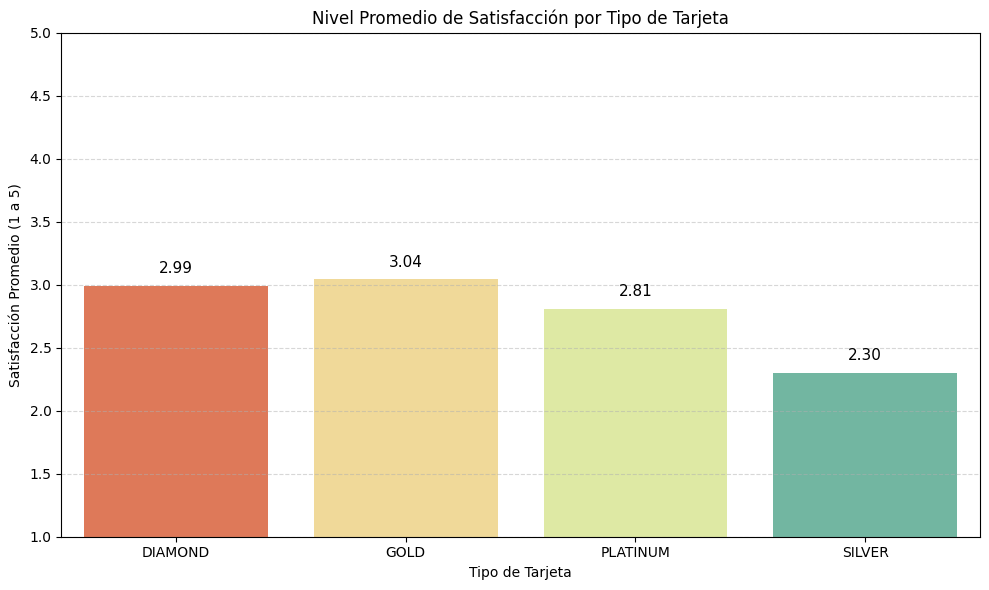

In [54]:
# =====================================================
# ¿Cuál es el nivel promedio de satisfacción por tipo de tarjeta?
# =====================================================

#Cruzar tipo de tarjeta (Card Type) con nivel de satisfacción (Satisfaction Score) te abre la puerta a:

#Detectar qué productos están generando mayor lealtad o agrado.

#Ver si cierto tipo de tarjeta tiene un diseño fallido (mucha queja, baja satisfacción).

#Identificar oportunidades para rediseñar la oferta o reforzar el producto mejor valorado.

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ------------------ Satisfacción promedio por tipo de tarjeta ------------------

# Agrupamos por tipo de tarjeta y calculamos la satisfacción promedio
df_satisf_tarjeta = df.groupby('Card Type')['Satisfaction Score'].mean().reset_index()

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_satisf_tarjeta,
    x='Card Type',
    y='Satisfaction Score',
    hue='Card Type',
    palette='Spectral',
    dodge=False,
    legend=False
)
plt.title('Nivel Promedio de Satisfacción por Tipo de Tarjeta')
plt.ylabel('Satisfacción Promedio (1 a 5)')
plt.xlabel('Tipo de Tarjeta')
plt.ylim(1, 5)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Etiquetas con valor numérico encima de cada barra
for i, row in df_satisf_tarjeta.iterrows():
    plt.text(i, row['Satisfaction Score'] + 0.1, f"{row['Satisfaction Score']:.2f}", ha='center', fontsize=11)

plt.tight_layout()
plt.show()

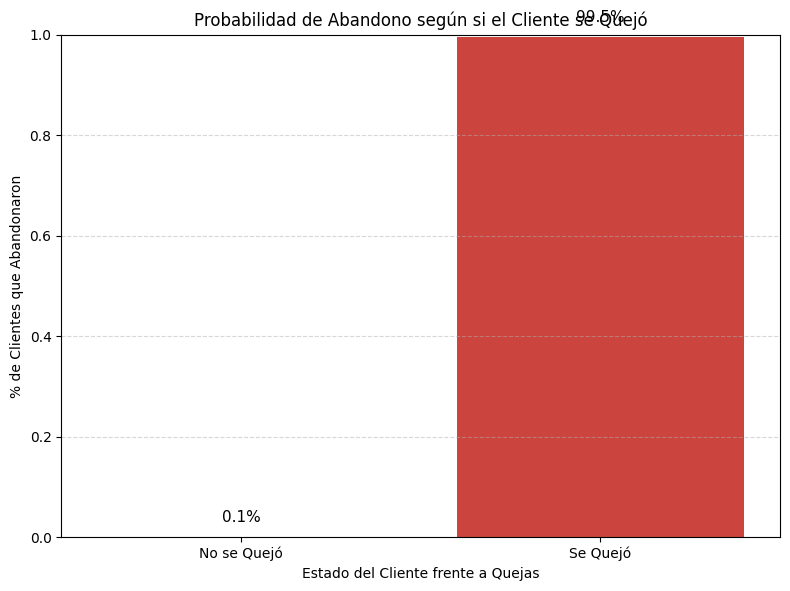

In [55]:
# =====================================================================
#¿Los clientes que se quejan (Complain = 1) tienen mayor probabilidad de abandonar el banco?
# =====================================================================

#Veamos si los clientes que se quejan (Complain == 1) tienen mayor tasa de abandono (Exited == 1) que los que no se quejan.

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ------------------ Tasa de abandono según quejas ------------------

# Agrupamos por si se quejaron o no, y calculamos proporción de abandono
df_quejas = df.groupby('Complain')['Exited'].mean().reset_index()

# Mapeamos a etiquetas para el gráfico
df_quejas['Estado_Queja'] = df_quejas['Complain'].map({0: 'No se Quejó', 1: 'Se Quejó'})

# Gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(
    data=df_quejas,
    x='Estado_Queja',
    y='Exited',
    hue='Estado_Queja',
    palette='Reds',
    dodge=False,
    legend=False
)
plt.title('Probabilidad de Abandono según si el Cliente se Quejó')
plt.ylabel('% de Clientes que Abandonaron')
plt.xlabel('Estado del Cliente frente a Quejas')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Etiquetas con porcentaje encima de las barras
for i, row in df_quejas.iterrows():
    plt.text(i, row['Exited'] + 0.03, f"{row['Exited']*100:.1f}%", ha='center', fontsize=11)

plt.tight_layout()
plt.show()

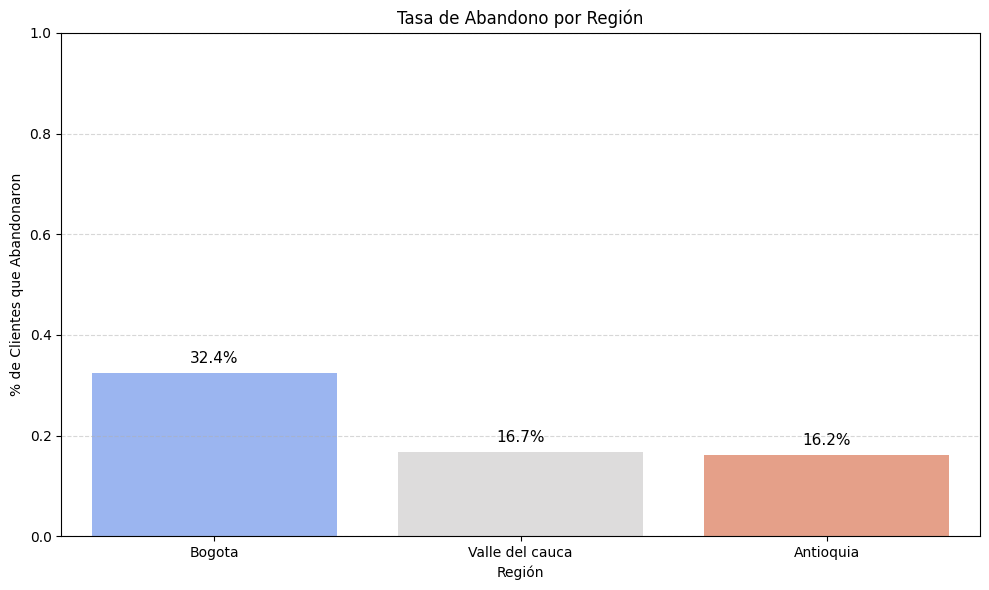

In [56]:
# =====================================================================
# ¿Cómo varía la tasa de abandono por region (Geography)?
# =====================================================================

#Esta pregunta va directo al análisis geográfico de la fuga de clientes, lo cual es clave para detectar zonas donde:

#Las estrategias de fidelización están fallando.

#Hay contextos socioeconómicos o culturales que influyen.

#El servicio o la cobertura de productos no es adecuada.

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ------------------ Tasa de abandono por región ------------------

df_abandono_geo = df.groupby('Geography')['Exited'].mean().reset_index()
df_abandono_geo.rename(columns={'Exited': 'TasaAbandono'}, inplace=True)
df_abandono_geo = df_abandono_geo.sort_values('TasaAbandono', ascending=False).reset_index(drop=True)

plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    data=df_abandono_geo,
    x='Geography',
    y='TasaAbandono',
    hue='Geography',
    palette='coolwarm',
    dodge=False,
    legend=False
)

plt.title('Tasa de Abandono por Región')
plt.ylabel('% de Clientes que Abandonaron')
plt.xlabel('Región')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.5)

for i, row in df_abandono_geo.iterrows():
    plt.text(i, row['TasaAbandono'] + 0.02, f"{row['TasaAbandono']*100:.1f}%", ha='center', fontsize=11)

plt.tight_layout()
plt.show()


Perfil de Clusters entre Clientes que Abandonaron:

               Age Gender_encoded Card_encoded        Balance  Cantidad
Cluster                                                                
0        44.882709         Female         GOLD  121607.825381       827
1        44.779562           Male         GOLD  122810.479182       685
2        44.834601         Female         GOLD    1875.023327       526


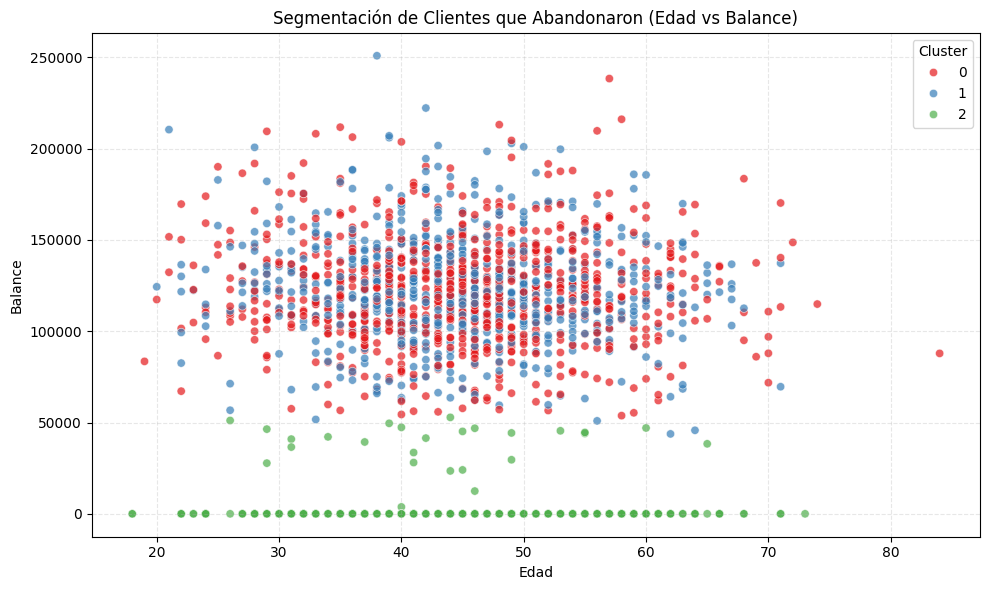

In [57]:
# =====================================================================
# ¿Cuál es el perfil (edad, sexo, tipo de tarjeta, saldo) de los clientes que han abandonado?
# =====================================================================

#análisis de segmentación de fuga: no solo saber quién se va, sino entender qué tipo de personas son los que se van.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans

# 1. Filtrar solo los clientes que han abandonado
df_exited = df[df['Exited'] == 1].copy()

# 2. Codificar variables categóricas
le_gender = LabelEncoder()
le_card = LabelEncoder()

df_exited['Gender_encoded'] = le_gender.fit_transform(df_exited['Gender'])      # Male = 1, Female = 0
df_exited['Card_encoded'] = le_card.fit_transform(df_exited['Card Type'])       # Numérica para clustering

# 3. Seleccionar variables para clustering
X = df_exited[['Age', 'Gender_encoded', 'Card_encoded', 'Balance']]

# 4. Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Clustering con KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df_exited['Cluster'] = kmeans.fit_predict(X_scaled)

# 6. Perfil promedio por clúster
perfil_clusters = df_exited.groupby('Cluster').agg({
    'Age': 'mean',
    'Gender_encoded': lambda x: le_gender.inverse_transform([round(x.mean())])[0],
    'Card_encoded': lambda x: le_card.inverse_transform([round(x.mean())])[0],
    'Balance': 'mean',
    'Cluster': 'count'
}).rename(columns={'Cluster': 'Cantidad'})

print("Perfil de Clusters entre Clientes que Abandonaron:\n")
print(perfil_clusters)

# 7. Visualización en 2D (Edad vs Balance coloreado por clúster)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_exited,
    x='Age',
    y='Balance',
    hue='Cluster',
    palette='Set1',
    alpha=0.7
)
plt.title('Segmentación de Clientes que Abandonaron (Edad vs Balance)')
plt.xlabel('Edad')
plt.ylabel('Balance')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


Clúster 0: Mujeres de mediana edad con alto saldo
Perfil bancario fuerte, con tarjeta GOLD.
Se están yendo a pesar de tener más de $120K en balance.

Clúster 1: Hombres de mediana edad con alto saldo
Muy similar al Clúster 0 pero masculino.

Clúster 2: Mujeres con saldo muy bajo
Edad similar, pero casi sin saldo. Este es un perfil potencialmente desatendido o abandonado por el banco.

**Relaciones y análisis predictivo**
* ¿Existe una correlación significativa entre edad y Credit Score?
* ¿Qué características comparten los clientes con alto engagement (medido por Point Earned, NumOfProducts, IsActiveMember = 1)?
* ¿Cómo varían los puntajes de satisfacción según el número de productos contratados?

Coeficiente de correlación Pearson (Age vs Credit Score): -0.0040


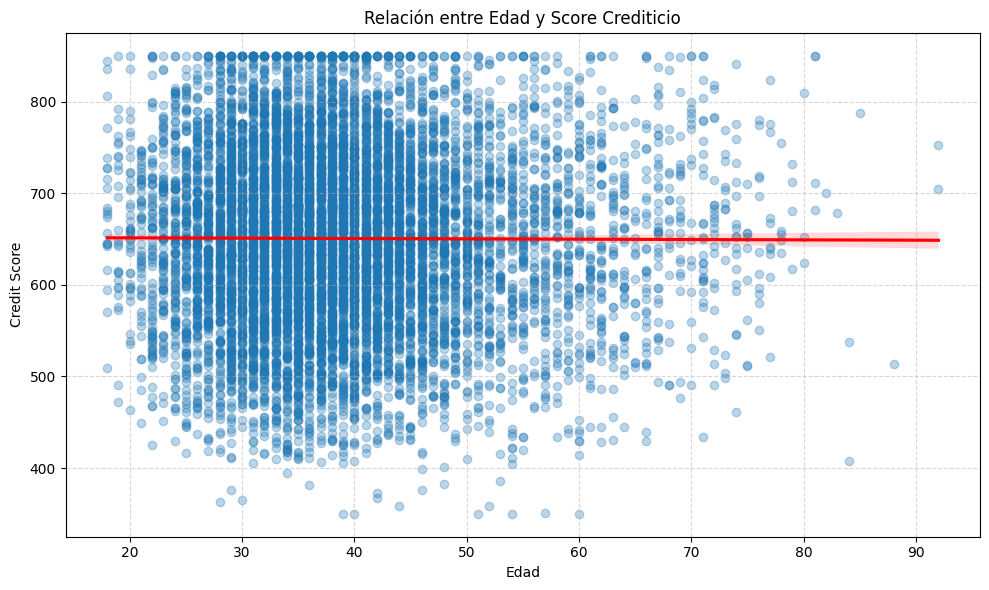

In [58]:
# =====================================================================
# ¿Existe una correlación significativa entre edad y Credit Score?
# =====================================================================

#entender si la edad de un cliente está relacionada con su nivel de riesgo crediticio (CreditScore).

# Correlación de Pearson entre edad y score crediticio
correlacion = df['Age'].corr(df['CreditScore'])
print(f"Coeficiente de correlación Pearson (Age vs Credit Score): {correlacion:.4f}")

plt.figure(figsize=(10, 6))
sns.regplot(
    data=df,
    x='Age',
    y='CreditScore',
    scatter_kws={'alpha':0.3},
    line_kws={'color': 'red'}
)
plt.title('Relación entre Edad y Score Crediticio')
plt.xlabel('Edad')
plt.ylabel('Credit Score')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Perfil de Clientes con Alto Engagement:

                        Promedio
Age                    39.193146
Balance             53327.849330
Satisfaction Score      2.719626
CreditScore           649.794393
EstimatedSalary     99024.111636

Género más frecuente: Male
Tipo de tarjeta más frecuente: PLATINUM
Región más frecuente: Antioquia

Total de clientes con alto engagement: 642


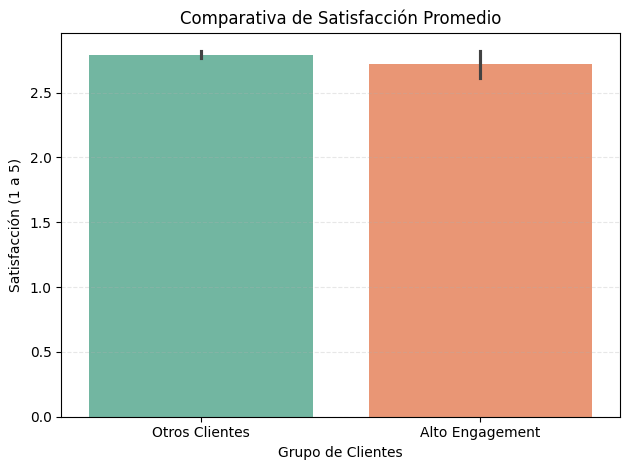

In [59]:
# =====================================================================
# ¿Qué características comparten los clientes con alto engagement (medido por Point Earned, NumOfProducts, IsActiveMember = 1)?
# =====================================================================

#Point Earned → programa de fidelización o beneficios.

#NumOfProducts → diversificación de servicios (tarjetas, créditos, seguros...).

#IsActiveMember → uso activo de canales digitales o productos.

#Vamos a agrupar a los clientes que tienen:

#IsActiveMember == 1

#Point Earned en el top 25%

#NumOfProducts en el top 25%

#Y luego analizamos sus características promedio: edad, género, balance, satisfacción, tipo de tarjeta.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------ Filtro de clientes con alto engagement ------------------

# Umbrales para definir alto engagement
umbral_points = df['Point Earned'].quantile(0.75)
umbral_productos = df['NumOfProducts'].quantile(0.75)

# Filtro combinado
df_engaged = df[
    (df['IsActiveMember'] == 1) &
    (df['Point Earned'] >= umbral_points) &
    (df['NumOfProducts'] >= umbral_productos)
].copy()

# ------------------ Perfil promedio de este grupo ------------------

perfil_engaged = df_engaged.agg({
    'Age': 'mean',
    'Balance': 'mean',
    'Satisfaction Score': 'mean',
    'CreditScore': 'mean',
    'EstimatedSalary': 'mean'
}).rename('Promedio')

# Categóricas: más frecuentes
tipo_tarjeta = df_engaged['Card Type'].mode().values[0]
genero = df_engaged['Gender'].mode().values[0]
geografia = df_engaged['Geography'].mode().values[0]

print("Perfil de Clientes con Alto Engagement:\n")
print(perfil_engaged.to_frame())
print(f"\nGénero más frecuente: {genero}")
print(f"Tipo de tarjeta más frecuente: {tipo_tarjeta}")
print(f"Región más frecuente: {geografia}")
print(f"\nTotal de clientes con alto engagement: {len(df_engaged)}")

# ------------------ Comparativa visual (opcional) ------------------

# Comparar satisfacción promedio vs resto de clientes
df['AltoEngagement'] = df.index.isin(df_engaged.index)

sns.barplot(
    data=df,
    x='AltoEngagement',
    y='Satisfaction Score',
    hue='AltoEngagement',
    palette='Set2',
    dodge=False,
    legend=False
)
plt.xticks([0, 1], ['Otros Clientes', 'Alto Engagement'])
plt.title('Comparativa de Satisfacción Promedio')
plt.ylabel('Satisfacción (1 a 5)')
plt.xlabel('Grupo de Clientes')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


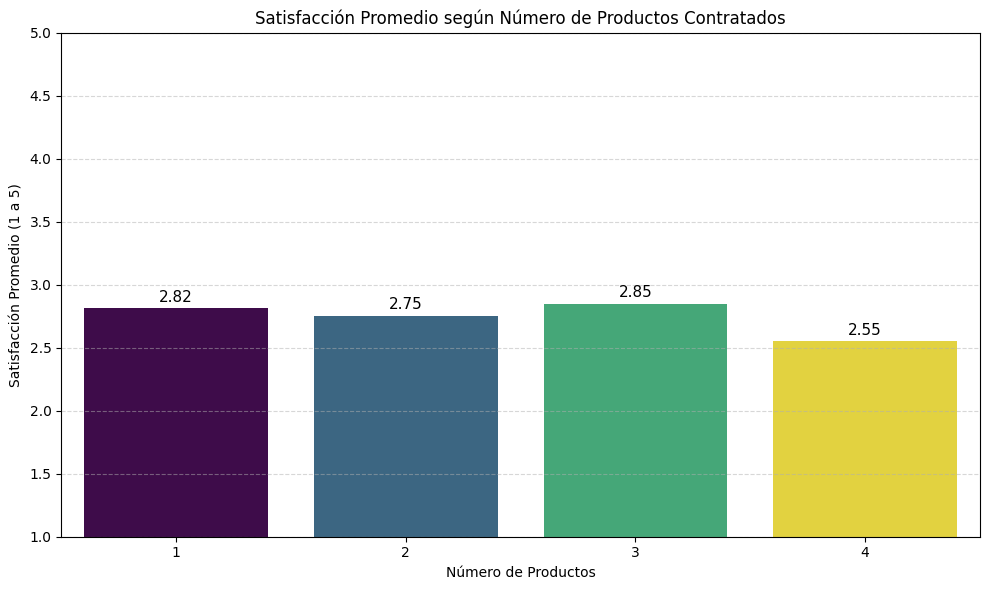

In [60]:
# =====================================================================
# ¿Cómo varían los puntajes de satisfacción según el número de productos contratados?
# =====================================================================

#cruzando intensidad de uso (NumOfProducts) con experiencia subjetiva (Satisfaction Score), y eso nos puede revelar cosas muy útiles para estrategia

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ------------Agrupar satisfacción promedio por cantidad de productos------

df_satisfxprod = df.groupby('NumOfProducts', observed=True)['Satisfaction Score'].mean().reset_index()

# ------------------ Visualización ------------------

plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_satisfxprod,
    x='NumOfProducts',
    y='Satisfaction Score',
    hue='NumOfProducts',
    palette='viridis',
    legend=False,
    dodge=False
)

plt.title('Satisfacción Promedio según Número de Productos Contratados')
plt.xlabel('Número de Productos')
plt.ylabel('Satisfacción Promedio (1 a 5)')
plt.ylim(1, 5)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Etiquetas encima de las barras
for i, row in df_satisfxprod.iterrows():
    plt.text(i, row['Satisfaction Score'] + 0.05, f"{row['Satisfaction Score']:.2f}", ha='center', fontsize=11)

plt.tight_layout()
plt.show()
